# Summer Olympic Games Analysis from 1896 to 2020
Team One: Dan Zhang, Daniel Zhou, Lu Li

October 20, 2021

## Introduction

The Olympic Games are one of the most important international sports festivals, which began in 1896 in Greece, and since then they have been staged every fourth year (Benagh, J., 2019). The Olympic Games is more than just a sport competition, because they have brought the world community together to promote peace, culture communication, and understanding through the athletics. The Olympic Games have also inspired people by its motto, which is “Faster, Higher, Stronger” (Douglas, P.S., 2004).

The Olympic Games also benefit the host countries as the Games will increase the host country’s global stature and create the sense of national pride. According to a global poll, a majority of people in 18 of 21 countries stated their nations’ performance at the Olympics was “important to their national pride,” (Procon.org., 2020). People are proud of their home country when hosting the Olympic Games and when winning the Games. Thus, in this project, the countries which have hosted the Olympic, and the number of the Olympic Games they have hosted will be analyzed. The relationship between being host country and the total number of medals of the country will also be investigated. Besides, significant political events, such as the World War, also have effects on the Olympic Games. Therefore, the total medals of the countries changed over time will be observed in order to figure out the effect of significant political events on the Olympic Games.


## Guiding Questions

(1)	Which countries have hosted the most Olympics? Which continents have hosted the most Olympics?

- For our first guiding question, we wanted to find out which countries / continents have hosted the Olympics and how many times they have hosted each. This question is important because as we know, the Olympics is an event that is participated by many nations across the world, the host in particular plays a central role in the Olympics in that they are the country / continent that is the center of attention and is affacted the most economically by the Olympics. The insight we gain from answering this question help us determong who are contributing the most in making the Olympics as successful and famous as they are today. This question also leads us into our other next question which looks for relationships between host and medal count.

(2)	Is there any relationship between being the host country and the number of medals one country won?

- The number of medals in the year of being host country will be observed, and will also be compared with the years of not being host country.

(3)	Which are the top countries based on the medals they have won? And is the medals tally related to the ecomony of the coutry?

-  In the 2020 Tokyo Olympics, 80% of the top 10 counties in the medals tally are high-income countries.The country's performance at the Olympics is usually related to the size of the economy. In general, the bigger the size of a country's economy, the more the medals. In this question, we will select the top countries by medal numbers, and also check their economy data.

(4)	Does political events affect the Olympic Games?

- The years with significant political events will be searched online. The number of medals of selected countries which have been involved in major political events will be investigated.


Through our guiding questions, we hope to see how the Olympics have interacted with different parts of the world, how global events have influenced the Olympics over the years.

## Dataset

The dataset (Tanoeiro, 2021) that we will be using comes from Kaggle.com. It is a website of open data sources that was recommended by the course. We are free to use the dataset for this project as it has been contributed to CC0, which means that a person has dedicated the dataset to the public domain, by waiving all his/her rights to the work worldwide under copyright law. (Creative Commons Corporation, 2021). 

The dataset we are using is a structured dataset and contains information on the medal statistics from all the summer Olympics that have happened from 1896 to 2020. It is stored in CSV format.

 There are 8 columns total:
- Column1: Year (int) – this column shows year the Olympic happened
- Columns 2, 3: Host country/city (string) – these columns show the host country / city where the Olympic happened
- Columns 4, 5: Country name/code (string) – these columns show the name / acronym of the country that medaled in a particular Olympic, only countries that medaled show up here
- Columns 6,7,8: Gold/Silver/Bronze (int) – these columns show the country’s gold/silver/bronze medal counts respectively

## Analysis

In [1]:
# import libraries

from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly as plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
mpl.rcParams['figure.dpi'] = 300

### Data Wrangling

Our data is already structured, so our data wrangling was not particularly intensive. Here is a short summary of the steps we did.
-	Import from CSV
-	Manually correcting errors in the data
-	Remove unneeded columns
-	Add columns for medal rankings
-	Sorting the data and re-indexing
This wrangling gave us the Dataframe which we will base our analysis on, however, each individual question required their own additional data wrangling involved to make the data more suitable for visualization.


In [2]:
# read raw data into a dataframe, csv file should be stored under the same folder
df = pd.read_csv('Summer_olympic_Medals.csv')

# pre data wrangling dataframe
print("Pre-wrangled data")
display(df.head())
display(df.tail())

# manual correction in data,
# replace host country 'Australia/Sweden' with 'Australia', 
# and host city 'Melbourne/Stockholm' with 'Melbourne',
# that Olympics is commonly known as Melbourne 1956,
# but technically it was a joint hosted event, because 1 event was held in Sweden that year (equestrian), 
# for the purpose of this analysis, we will not count Sweden as a host country for that year.
df.loc[(df.Host_country == 'Australia/Sweden'), 'Host_country'] = 'Australia'
df.loc[(df.Host_city == 'Melbourne/Stockholm'), 'Host_city'] = 'Melbourne'

# remove contry code column, because it has incomplete data
df = df.drop(columns=['Country_Code'])

# add a column for total medals
df["Total"] = df["Gold"] + df["Silver"] + df["Bronze"]

# add a column for ranking, rank by GOLD medals first, then silver/bronze medals
for i in df.Year.unique():
    df.loc[(df.Year == i), "Rank_Gold_First"] = df.loc[(df.Year == i), 
    ["Gold", "Silver", "Bronze"]].apply(tuple, axis=1).rank(method='min', ascending=False)
df.Rank_Gold_First = df.Rank_Gold_First.astype(int)

# add another column for ranking, rank by TOTAL medals first, then gold/silver/bronze medals
for i in df.Year.unique():
    df.loc[(df.Year == i), "Rank_Total_First"] = df.loc[(df.Year == i), 
    ["Total", "Gold", "Silver", "Bronze"]].apply(tuple, axis=1).rank(method='min', ascending=False)
df.Rank_Total_First = df.Rank_Total_First.astype(int)

# sort by: year(ascending), rank_gold_first(ascending), rank_total_first(ascending), country_name(ascending)
df = df.sort_values(by=['Year', 'Rank_Gold_First', 'Rank_Total_First', 
                        'Country_Name'], ascending=[True, True, True, True])
                        
# reset index column numbers
df.reset_index(drop=True, inplace=True)

# post data wrangling dataframe
print("Post-wrangled data")
display(df.head())
display(df.tail())

# code for outputing dataframe to csv file for debugging (if needed)
# df.to_csv('Summer_olympic_Medals_Wrangled.csv', index=False)

Pre-wrangled data


,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze
0,1896,Greece,Athens,Great Britain,GBR,2,3,2
1,1896,Greece,Athens,Hungary,HUN,2,1,3
2,1896,Greece,Athens,France,FRA,5,4,2
3,1896,Greece,Athens,United States,USA,11,7,2
4,1896,Greece,Athens,Germany,GER,6,5,2


,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze
1339,2020,Japan,Tokyo,Fiji,FIJ,1,0,1
1340,2020,Japan,Tokyo,Estonia,EST,1,0,1
1341,2020,Japan,Tokyo,Latvia,LAT,1,0,1
1342,2020,Japan,Tokyo,Bermuda,BER,1,0,0
1343,2020,Japan,Tokyo,Thailand,THA,1,0,1


Post-wrangled data


,Year,Host_country,Host_city,Country_Name,Gold,Silver,Bronze,Total,Rank_Gold_First,Rank_Total_First
0,1896,Greece,Athens,United States,11,7,2,20,1,2
1,1896,Greece,Athens,Greece,10,18,19,47,2,1
2,1896,Greece,Athens,Germany,6,5,2,13,3,3
3,1896,Greece,Athens,France,5,4,2,11,4,4
4,1896,Greece,Athens,Great Britain,2,3,2,7,5,5


,Year,Host_country,Host_city,Country_Name,Gold,Silver,Bronze,Total,Rank_Gold_First,Rank_Total_First
1339,2020,Japan,Tokyo,Grenada,0,0,1,1,86,86
1340,2020,Japan,Tokyo,Ivory Coast,0,0,1,1,86,86
1341,2020,Japan,Tokyo,Kuwait,0,0,1,1,86,86
1342,2020,Japan,Tokyo,Moldova,0,0,1,1,86,86
1343,2020,Japan,Tokyo,Syria,0,0,1,1,86,86


### Q1 Which countries have hosted the most Olympics? Which continents have hosted the most Olympics?

In [3]:
# Analyzing Guiding Question 1 - Host Countries / Continents

# wrangle data to fit question
host_df = df.loc[df['Host_country'] ==
                 df['Country_Name']][['Host_country', 'Year']]

host_count_df = host_df.groupby('Host_country').count().sort_values(by=['Year', 'Host_country'], ascending=[False, True]).rename(columns={'Year': 'Host_count'})

# import continent CSV and merge with host country csv
continent_df = pd.read_csv('ContinentLookup.csv')
host_continent_count_df = pd.merge(
    host_count_df, continent_df, on='Host_country', how='left')

We will first do a bar plot to see who the hosts are and their number of games hosted.

In [4]:
# plot host count bar chart with Plotly Express
fig = px.bar(host_count_df, title="Olympics Host Countries by Host Count", color=host_count_df.index, color_discrete_sequence=px.colors.qualitative.Light24,
             width=1200, height=600)
fig.update_layout(
    xaxis_title="Country",
    yaxis_title="Number of Olympic Games Hosted",
    showlegend=False,
    yaxis={'nticks': int(host_count_df.Host_count.max()+1)}
    )
fig.show()


As we can see from the bar plot:
-	United States has hosted the most Olympics with 4 total, 
-	Great Britain follow closely behind with 3 Olympics hosted, 
-	Australia, France, Greece, Japan has hosted 2 Olympics,
-	The rest of the hosts has hosted 1 Olympics each:  Belgium, Brazil, Canada, China, Finland, Germany, Italy, Mexico, Netherlands, South Korea, Soviet Union, Spain, Sweden, West Germany.

One can also argue that Germany has also hosted 2 Olympics if Germany and (the now defunct) West Germany are counted as one nation state.

We next plot out the host countries on a map to examine where these host countries are situated.


In [5]:
# plot host distribution map with Plotly Express
fig = px.choropleth(host_count_df, locations=host_count_df.index,
                    color=host_count_df.index,
                    hover_name=host_count_df.index,  # hover information
                    hover_data=['Host_count'],
                    locationmode='country names',
                    color_discrete_sequence=px.colors.qualitative.Light24,
                    title="Olympics Host Countries",
                    width=1200, height=600)
fig.show()

As we can see from the map, most of the host countries are situated in the northern hemisphere. The only 2 host countries from the southern hemisphere are Brazil and Australia. This makes sense as majority of Earth’s landmass is in the northern hemisphere.

So what about continent? We know that the United States has hosted the most Olympics, but does that mean North America as a continent is also leading the way in the number of Olympics hosted? We will plot the host countries again, but this time we will group them by continent.


In [6]:
# check to see which continent has hosted the most olympics
fig = px.sunburst(host_continent_count_df, path=[
                  'Host_continent', 'Host_country'], values='Host_count', 
                  width=600, height=600)
fig.show()

As we can see from the sunburst plot:
-	Europe has hosted the most Olympics with 16 total games hosted (by 12 different countries), 
-	North America is second with 6 total games hosted (by 3 different countries), 
-	Asia is next with 4 total games hosted (by 3 different countries),
-	Australia (the continent) is fourth with 2 games hosted (by Australia, the country)
-	South America is fifth with 1 game hosted (by Brazil)

Lets plot it out on a map to see if there are any continents that we missed.

In [7]:
# plot host continent distribution map with Plotly Express
fig = px.choropleth(host_continent_count_df, locations='Host_country',
                    color='Host_continent',
                    hover_name='Host_country',  # hover information
                    hover_data=['Host_count', 'Host_continent'],
                    locationmode='country names',
                    color_discrete_sequence=px.colors.qualitative.Plotly,
                    title="Olympics Host Countries by Continent",
                    width=1200, height=600)
fig.show()

From our map, we can see that Africa and Antarctica has not hosted any Olympic games
- In Antarctica's case, this is expected due to the frigid weather conditions, and the fact that there are no permanent human settlements on that continent.
- In Africa's case, this is much more interesting, as it is the continent containing the most countries in the world (total of 54 Countries), it has never hosted a single Olympic game, and as of this writing, is not scheduled to host any in the future. 

As we can see, a vast majority of games are hosted in the European continent. This is not surprising as Europe is known to be an economic powerhouse, it is also convenient to coordinate the games there as the International Olympic Committee is situated in Europe (Switzerland) as well. 


Lastly, we will plot an interactive timeline of host countries, so we can check the selection of host countries over time.

In [8]:
# plot interactive timeline graph of hosts with a slider

# min year in dataset
year = 1896

data_slider = []
for year in host_df['Year']:
    df_segmented = host_df[(host_df['Year'] <= year)]

    df_segmented = df_segmented.groupby('Host_country').count().sort_values(
        by=['Year', 'Host_country'], ascending=[False, True]).rename(columns={'Year': 'Host_count'})

    data_each_yr = dict(
        type='choropleth',
        locations=df_segmented.index,
        locationmode='country names',
        autocolorscale= True,
        colorbar={'title': '# of Olympics Hosted'},
        
        z=df_segmented['Host_count'],
        zmax=4,
        zmin = 0,
        hoverinfo ='all',
        )

    data_slider.append(data_each_yr)

steps = []
for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='{}'.format(host_df.iloc[i]['Year']))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=len(data_slider)-1, pad={"t": 1}, steps=steps)]

layout = dict(title='Timeline of Number of Olympics Hosted by Country', geo=dict(scope='world',
                                                                 projection={'type': 'equirectangular'}),
              sliders=sliders, width=1200, height=600)

fig = go.Figure(data=data_slider, layout=layout)
fig.update_layout(
    sliders=sliders
)
fig.show()

As we move the slider to earlier years, we can see that the Olympics was mostly an European and United States hosted event, which is as expected based on our previous analysis of host countries and host continents, its not until recent years that the Olympics started to spread out the hosting duties more to different continents.

Here are the years of the first Olympic games hosted on each continent in chronological order
- Europe - 1896
- North America - 1904
- Australia - 1956
- Asia - 1964
- South America - 2016
- Africa - N/A
- Antactica - N/A


So in conclusion for this guiding question, in terms of countries, the United States has hosted the most Olympic games, but in terms of continents, Europe has hosted the most Olympic games. 

### Q2 Is there any relationship between being the host country and the number of medals one country won?

Hosting the Olympic Games is an incredible honor for a country. Hosting the Olympics not only will boost the economic, cultural, environmental, tourism and sense of national pride, but also will have higher performance in terms of medals (Asgari, B. and Khorshidi, R., 2013). In order to further analyze this point, the host countries from 1986 to 2020 were compared with the best non-host-countries in those years regarding the medals. The table and bar chart below list the number of golds, silver, bronze and total medals of the host countries and the best non-host-countries in that year. From the bar chart, we can see that in the years of 1986, 1900, 1904, 1908, 1932, 1936, 1980, 1984, 1996 and 2008, the performance of host countries were obviously better than those non-host countries. However, in other years, the best countries of the non-host-countries won more medals. So, it is hard to draw the conclusion if we simply compare the host country with the best of the non-host-country in that year, because the performance of one country could be affected by many factors, and being the host country is just one factor. In order to eliminate the other factors, we also compared the medals numbers of one country when it was the host with the average medals numbers when it was not the host country by radar charts. 

The radar charts present the medals numbers of a country when it is the host in orange color. The blue color indicates the average medal numbers when it is not the host. It is very obvious that there are totally 29 Olympic Games from 1896 to 2020, and in most cases, one country won more medals when it is the host country, with only three exceptions, which were Great Britain in 1948, West Germany in 1972 and Canada in 1976. Actually, the performance of the host country West Germany (1972) was similar to when it was not the host country. Therefor, being host country can improve the average medals tally. 

In [9]:

df3_Host = df[df['Host_country']==df['Country_Name']].drop(['Rank_Gold_First','Rank_Total_First'], 
axis = 1).set_index(['Host_country','Host_city']) 

df4_non_Host = df[df['Host_country']!=df['Country_Name']] 

idx = df4_non_Host.groupby(['Year','Host_country','Host_city'])['Total'].transform(max)==df4_non_Host['Total']
df4_non_Host_max = df4_non_Host[idx]
df4_non_Host_max = df4_non_Host_max.drop(['Rank_Gold_First','Rank_Total_First'], axis = 1).set_index(['Host_country','Host_city']) 


df4_non_Host_max.columns = ['Year','Country_Name_Non_Host','Gold_Non_Host','Silver_Non_Host','Bronze_Non_Host','Total_Non_Host']

df3_plot = pd.merge(df3_Host, df4_non_Host_max, on='Year')
df3_plot.columns = ['Year',	'Host_Country',	'Gold_Host', 'Silver_Host',	'Bronze_Host', 'Total_Host', 
'Non_Host_Country', 'Gold_Non_Host', 'Silver_Non_Host', 'Bronze_Non_Host', 'Total_Non_Host']
display(df3_plot)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=df3_plot.Year,
    y=df3_plot.Gold_Host,
    name='Gold_Host',
    marker_color='gold',
    text=df3_plot['Host_Country']
))
fig.add_trace(go.Bar(
    x=df3_plot.Year,
    y=df3_plot.Silver_Host,
    name='Silver_Host',
    marker_color='silver',
    text=df3_plot['Host_Country']
))
fig.add_trace(go.Bar(
    x=df3_plot.Year,
    y=df3_plot.Bronze_Host,
    name='Bronze_Host',
    marker_color='saddlebrown',
    text=df3_plot['Host_Country']
))

fig.add_trace(go.Bar(
    x=df3_plot.Year,
    y=df3_plot.Gold_Non_Host,
    name='Gold_Non_Host',
    marker_color='green',
    text=df3_plot['Non_Host_Country']
))
fig.add_trace(go.Bar(
    x=df3_plot.Year,
    y=df3_plot.Silver_Non_Host,
    name='Silver_Non_Host',
    marker_color='blue',
    text=df3_plot['Non_Host_Country']
))
fig.add_trace(go.Bar(
    x=df3_plot.Year,
    y=df3_plot.Bronze_Non_Host,
    name='Bronze_Non_Host',
    marker_color='red',
    text=df3_plot['Non_Host_Country']
))


fig.update_yaxes(range=[0, 100], tick0 =0, dtick = 10, title_text = "Medal Number")
fig.update_xaxes(range=[1894, 2022], tick0 =1896, dtick = 4, title_text = "Year")
fig.update_layout(title="Host Medal Number vs. Best Non_Host Medal Number")
fig.show()

,Year,Host_Country,Gold_Host,Silver_Host,Bronze_Host,Total_Host,Non_Host_Country,Gold_Non_Host,Silver_Non_Host,Bronze_Non_Host,Total_Non_Host
0,1896,Greece,10,18,19,47,United States,11,7,2,20
1,1900,France,27,38,37,102,United States,19,14,15,48
2,1904,United States,76,78,77,231,Germany,4,5,6,15
3,1908,Great Britain,56,51,39,146,United States,23,12,12,47
4,1912,Sweden,24,24,17,65,United States,26,19,19,64
5,1920,Belgium,16,12,14,42,United States,41,27,27,95
6,1924,France,13,15,10,38,United States,45,27,27,99
7,1928,Netherlands,6,9,4,19,United States,22,18,16,56
8,1932,United States,41,32,30,103,Italy,12,12,12,36
9,1936,Germany,33,26,30,89,United States,24,20,12,56


In [10]:
df3_Host = df[df['Host_country']==df['Country_Name']].drop(['Rank_Gold_First','Rank_Total_First','Country_Name'], axis = 1).set_index(['Host_country','Host_city'])
df3_Host = df3_Host.reset_index('Host_country')
df3_Host.columns = ['Country_Name','Year','Gold','Silver','Bronze','Total']
df4_non_Host = df[df['Host_country']!=df['Country_Name']].drop(['Host_country','Host_city','Rank_Gold_First','Rank_Total_First','Year'], axis = 1).groupby('Country_Name').mean()
df4_non_Host = df4_non_Host.reset_index()
df4_non_Host.columns = ['Country_Name','Gold_Mean','Silver_Mean','Bronze_Mean','Total_Mean']
df5_plot = pd.merge(df3_Host, df4_non_Host, on='Country_Name').sort_values('Year')
df5_plot

,Country_Name,Year,Gold,Silver,Bronze,Total,Gold_Mean,Silver_Mean,Bronze_Mean,Total_Mean
0,Greece,1896,10,18,19,47,1.055556,1.166667,1.000000,3.222222
2,France,1900,27,38,37,102,6.777778,7.370370,8.518519,22.666667
4,United States,1904,76,78,77,231,34.000000,26.208333,24.000000,84.208333
8,Great Britain,1908,56,51,39,146,7.538462,9.115385,9.653846,26.307692
11,Sweden,1912,24,24,17,65,4.769231,5.846154,6.230769,16.846154
12,Belgium,1920,16,12,14,42,1.200000,1.800000,1.840000,4.840000
3,France,1924,13,15,10,38,6.777778,7.370370,8.518519,22.666667
13,Netherlands,1928,6,9,4,19,3.560000,3.840000,4.720000,12.120000
5,United States,1932,41,32,30,103,34.000000,26.208333,24.000000,84.208333
14,Germany,1936,33,26,30,89,10.562500,11.312500,13.562500,35.437500


In [11]:
a = [{"type": "polar"}]*4


fig = make_subplots(rows=1, cols=4, specs=[a], horizontal_spacing = 0.1, subplot_titles=("Greece_1986", "France_1990", "United States_1904", "Great Britain_1908"))

categories = ['Gold','Silver','Bronze','Total']

for i in range(4):
    if i<3:
        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i, 2:6],
              theta=categories,
              fill='toself',
              name='Host', 
              line=dict(color='orange'),
              showlegend = False
        ), row=1, col=i+1)

        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i, 6:10],
              theta=categories,
              fill='toself',
              name='Not_Host', 
              line=dict(color='skyblue'),
              showlegend = False
        ), row=1, col=i+1)
    else:
        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i, 2:6],
              theta=categories,
              fill='toself',
              name='Host', 
              line=dict(color='orange')
        ), row=1, col=i+1)

        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i, 6:10],
              theta=categories,
              fill='toself',
              name='Not_Host', 
              line=dict(color='skyblue')
        ), row=1, col=i+1)
        
        fig.update_layout(margin=dict(t=30, b=30, l=60, r=60))



fig.show()

In [12]:

fig = make_subplots(rows=1, cols=4, specs=[a], horizontal_spacing = 0.1, subplot_titles=("Sweden_1912", "Belgium_1920", "France_1924", "Netherlands_1928"))

categories = ['Gold','Silver','Bronze','Total']

for i in range(4):
    if i<3:
        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+4, 2:6],
              theta=categories,
              fill='toself',
              name='Host',
              line=dict(color='orange'),
              showlegend = False
        ), row=1, col=i+1)

        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+4, 6:10],
              theta=categories,
              fill='toself',
              name='Not_Host', 
              line=dict(color='skyblue'),
              showlegend = False
        ), row=1, col=i+1)
    else:
        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+4, 2:6],
              theta=categories,
              fill='toself',
              name='Host',
              line=dict(color='orange'),
        ), row=1, col=i+1)

        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+4, 6:10],
              theta=categories,
              fill='toself',
              name='Not_Host', 
              line=dict(color='skyblue'),
        ), row=1, col=i+1)
        
        fig.update_layout(margin=dict(t=30, b=30, l=60, r=60))
fig.show()

In [13]:
fig = make_subplots(rows=1, cols=4, specs=[a], horizontal_spacing = 0.1, subplot_titles=("United States_1932", "Germany_1936", "Great Britain_1948", "Finland_1952"))

categories = ['Gold','Silver','Bronze','Total']

for i in range(4):
    if i<3:
        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+8, 2:6],
              theta=categories,
              fill='toself',
              name='Host', 
              line=dict(color='orange'),
              showlegend = False
        ), row=1, col=i+1)

        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+8, 6:10],
              theta=categories,
              fill='toself',
              name='Not_Host', 
              line=dict(color='skyblue'),
              showlegend = False
        ), row=1, col=i+1)
    else:
        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+8, 2:6],
              theta=categories,
              fill='toself',
              name='Host', 
              line=dict(color='orange')
        ), row=1, col=i+1)

        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+8, 6:10],
              theta=categories,
              fill='toself',
              name='Not_Host', 
              line=dict(color='skyblue')
        ), row=1, col=i+1)
        
        fig.update_layout(margin=dict(t=30, b=30, l=60, r=60))
fig.show()

In [14]:
fig = make_subplots(rows=1, cols=4, specs=[a], horizontal_spacing = 0.1, subplot_titles=("Australia_1956", "Italy_1960", "Japan_1964", "Mexico_1968"))

categories = ['Gold','Silver','Bronze','Total']

for i in range(4):
    if i<3:
        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+12, 2:6],
              theta=categories,
              fill='toself',
              name='Host', 
              line=dict(color='orange'),
              showlegend = False
        ), row=1, col=i+1)

        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+12, 6:10],
              theta=categories,
              fill='toself',
              name='Not_Host', 
              line=dict(color='skyblue'),
              showlegend = False
        ), row=1, col=i+1)
    else:
        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+12, 2:6],
              theta=categories,
              fill='toself',
              name='Host', 
              line=dict(color='orange')
        ), row=1, col=i+1)

        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+12, 6:10],
              theta=categories,
              fill='toself',
              name='Not_Host', 
              line=dict(color='skyblue')
        ), row=1, col=i+1)
        
        fig.update_layout(margin=dict(t=30, b=30, l=60, r=60))
fig.show()

In [15]:
fig = make_subplots(rows=1, cols=4, specs=[a], horizontal_spacing = 0.1, subplot_titles=("West Germany_1972", "Canada_1976", "Soviet Union_1980", "United States_1984"))

categories = ['Gold','Silver','Bronze','Total']

for i in range(4):
    if i<3:
        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+16, 2:6],
              theta=categories,
              fill='toself',
              name='Host', 
              line=dict(color='orange'),
              showlegend = False
        ), row=1, col=i+1)

        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+16, 6:10],
              theta=categories,
              fill='toself',
              name='Not_Host', 
              line=dict(color='skyblue'),
              showlegend = False
        ), row=1, col=i+1)
    else:
        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+16, 2:6],
              theta=categories,
              fill='toself',
              name='Host', 
              line=dict(color='orange')
        ), row=1, col=i+1)

        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+16, 6:10],
              theta=categories,
              fill='toself',
              name='Not_Host', 
              line=dict(color='skyblue')
        ), row=1, col=i+1)
        
        fig.update_layout(margin=dict(t=30, b=30, l=60, r=60))
fig.show()

In [16]:
fig = make_subplots(rows=1, cols=4, specs=[a], horizontal_spacing = 0.1, subplot_titles=("South Korea_1988", "Spain_1992", "United States_1996", "Australia_2000"))

categories = ['Gold','Silver','Bronze','Total']

for i in range(4):
    if i<3:
        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+20, 2:6],
              theta=categories,
              fill='toself',
              name='Medals when Host', 
              line=dict(color='orange'),
              showlegend = False
        ), row=1, col=i+1)

        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+20, 6:10],
              theta=categories,
              fill='toself',
              name='Not_Host', 
              line=dict(color='skyblue'),
              showlegend = False
        ), row=1, col=i+1)
    else:
        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+20, 2:6],
              theta=categories,
              fill='toself',
              name='Host', 
              line=dict(color='orange')
        ), row=1, col=i+1)

        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+20, 6:10],
              theta=categories,
              fill='toself',
              name='Not_Host', 
              line=dict(color='skyblue')
        ), row=1, col=i+1)
        
        fig.update_layout(margin=dict(t=30, b=30, l=60, r=60))
fig.show()

In [17]:
fig = make_subplots(rows=1, cols=4, specs=[a], horizontal_spacing = 0.1, subplot_titles=("Greece_2004", "China_2008", "Great Britain_2012", "Brazil_2016"))

categories = ['Gold','Silver','Bronze','Total']

for i in range(4):
    if i<3:
        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+24, 2:6],
              theta=categories,
              fill='toself',
              name='Host', 
              line=dict(color='orange'),
              showlegend = False
        ), row=1, col=i+1)

        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+24, 6:10],
              theta=categories,
              fill='toself',
              name='Not_Host', 
              line=dict(color='skyblue'),
              showlegend = False
        ), row=1, col=i+1)
    else:
        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+24, 2:6],
              theta=categories,
              fill='toself',
              name='Host', 
              line=dict(color='orange')
        ), row=1, col=i+1)

        fig.add_trace(go.Scatterpolar(
              r=df5_plot.iloc[i+24, 6:10],
              theta=categories,
              fill='toself',
              name='Not_Host', 
              line=dict(color='skyblue')
        ), row=1, col=i+1)
        
        fig.update_layout(margin=dict(t=30, b=30, l=60, r=60))
fig.show()

In [18]:
fig = go.Figure()

categories = ['Gold','Silver','Bronze','Total']

fig.add_trace(go.Scatterpolar(
      r=df5_plot.iloc[28, 2:6],
      theta=categories,
      fill='toself',
      name='Host',
      line=dict(color='orange')
))

fig.add_trace(go.Scatterpolar(
      r=df5_plot.iloc[28, 6:10],
      theta=categories,
      fill='toself',
      name='Not_Host',
      line=dict(color='skyblue')
))

fig.update_layout(margin=dict(t=50, b=50, l=60, r=60))

fig.update_layout(showlegend=True, title={
        'text': "Japan_2020",
        'y':0.98,
        'x':0.47,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

### Q3 Which are the top countries based on the medals they have won? And is the medals tally related to the economy of the country?

The country's performance at the Olympics is related to the size of the economy. In general, the bigger the size of a country's economy, the more the medals. Of course, there are a few exceptions such as Kenya, Ethiopia and Ukraine. But during the Tokyo Olympics, 80% of the top 10 counties in the medals tally are high-income countries (Sen, S.,2021). In order to further observe the relationship between the performance in Olympic and the economy of the country, the top 20 countries have been selected based on the total medals they have won from 1986 to 2020.

First, a pie chart has been made to show the partial of each country in the accumulated medal tally from 1986 to 2020. The top 20 countries have been listed while others have been collected together. It can be observed that the top 1 country in the medal tally is the United States, which occupied 15.7%. It is also widely known that United States is the largest economies in the world. According to World Population Review, the top 10 countries by GDP in 2020 are: United States (GDP: 20.49 trillion), China (GDP: 13.4 trillion), Japan (GDP: 4.97 trillion), Germany (GDP: 4.97 trillion), United Kingdom (GDP: 2.83 trillion), France (GDP: 2.78 trillion), India  (GDP: 2.72 trillion), Italy (GDP: 2.07 trillion), Brazil (GDP: 1.87 trillion) and Canada (GDP: 1.71 trillion)(World Population Review,2020). From the pie chart, if we do not consider Soviet Union as it has been disintegrated in 1991, the top 10 countries based on the medal tally are United States, Great Britain, France, Germany, China, Italy, Australia, Hungary, Sweden, Japan. So, 7 of those 10 countries are also in the top 10 by GDP, which are United States, Great Britain, France, Germany, China, Italy, Japan.

The bar charts have been applied to present the accumulated gold, silver, and bronze medals of the top 20 countries from 1986 to 2020 separately. For the gold metals, the United States has won 1060 gold metals from 1986 to 2020, which is even two times more than the 2nd country (Soviet Union, 395 gold metals). The same trends can be also observed in silver and bronze medals. Therefore, United States is the top 1 country regarding all the three medals. 
Therefore, we can get the conclusion that the medals tally of one country is related to its economy size. Here, we only consider GDP as an indicator for the economy size of a country, and future research could focus on more economy parameters.

In [19]:
df1 = df.groupby('Country_Name').sum().sort_values("Total", ascending=False)
df1 = df1.drop(['Year', 'Rank_Gold_First', 'Rank_Total_First'], axis=1)

df_plot = df1.iloc[0:20, :]

df2 = df1.iloc[20:, :].sum(axis=0)
df2 = pd.DataFrame(df2).transpose()
df2.index = ['Other Countries']
df_plot_all = df_plot.append(df2)
display(df_plot_all)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_plot.index,
    y=df_plot.Total,
    name='Total Medal',
    marker_color='deepskyblue'
))

fig = px.pie(df_plot_all, values='Total', names=df_plot_all.index,
             title='Total Medal of Olympic for Top 20 Countries')
fig.update_layout(margin=dict(t=30, b=0, l=0, r=0))
fig.show()

,Gold,Silver,Bronze,Total
United States,1060,832,738,2630
Soviet Union,395,319,296,1010
Great Britain,284,319,315,918
France,223,252,277,752
Germany,202,207,247,656
China,262,199,173,634
Italy,219,188,213,620
Australia,164,173,210,547
Hungary,181,154,176,511
Sweden,148,176,179,503


In [20]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_plot.index,
    y=df_plot.Gold,
    name='Gold',
    marker_color='gold'
))
fig.add_trace(go.Bar(
    x=df_plot.index,
    y=df_plot.Silver,
    name='Silver',
    marker_color='silver'
))
fig.add_trace(go.Bar(
    x=df_plot.index,
    y=df_plot.Bronze,
    name='Bronze',
    marker_color='saddlebrown'
))
fig.update_yaxes(range=[0, 1200], tick0=0, dtick=400,
                 title_text="Medal Number")
fig.update_xaxes(title_text="Top 20 Countries")
fig.show()

In [21]:
colors = px.colors.qualitative.Plotly
cut_interval = [1200, 2400]

fig = make_subplots(
    rows=2, cols=1,
    vertical_spacing=0.05,
    shared_xaxes=True,
)

for i, col in enumerate(df_plot.columns):
    fig.add_trace(go.Bar(x=df_plot.index,
                         y=df_plot[col],
                         name=col,
                         marker_color=colors[i],
                         legendgroup=col,
                         ), row=2, col=1)

for i, col in enumerate(df_plot.columns):
    fig.add_trace(go.Bar(x=df_plot.index,
                         y=df_plot[col],
                         name=col,
                         marker_color=colors[i],
                         legendgroup=col,
                         showlegend=False,
                         ), row=1, col=1)

fig.update_yaxes(range=[cut_interval[1], 2700], row=1, col=1)
fig.update_xaxes(visible=False, row=1, col=1)
fig.update_yaxes(range=[0, cut_interval[0]], row=2, col=1)
fig.update_layout(title="Medal Number for Top 20 Countries")
fig.show()

### Q4 Does political events affect the Olympic Games?

Rule 50 of the Olympic Charter reads: “No kind of demonstration or political, religious or racial propaganda is permitted in any Olympic sites, venues or other areas.” [(IOC Athletes’ Commission, 2021)](https://stillmedab.olympic.org/media/Document%20Library/OlympicOrg/News/2020/01/Rule-50-Guidelines-Tokyo-2020.pdf)

But politics have disrupted the Olympic Games throughout its history, whether through boycotts, propaganda, or protests. Here we will analyze the effect of some of these political events. 

The 1916, 1940 and 1944 Olympic Games that were scheduled were all cancelled [(Cancelled Olympic Games - Wikipedia, 2021)](https://en.wikipedia.org/wiki/Category:Cancelled_Olympic_Games) due to World War I and World War II. 

Talking about World War I and World War II, one country jumps out right away, Germany. So we will plot and analyze Germany's medal number. 

Pre-World War 2, many historians believed that Hitler saw the 1936 Games as an opportunity to promote his government and ideals of racial supremacy (Large, 2007), this is illustrated by the fact that the Germans won the most medals overall in that particular Olympics.

We see from the plot that Germany has competed in all the Games except 1920, 1924 and 1948. Germany were not permitted to go to those particular Olympics, as a consequence of the wars. 

United Team of Germany was a combined team of athletes from West Germany and East Germany that competed in the 1956, 1960, and 1964 Olympic Games. 

From 1968 until the end of the Cold War, the two nation states sent independent teams designated as West and East Germany, this lasted all the way until the reunification of Germany in 1992. [ (Germany at the Olympics - Wikipedia, 2021)](https://en.wikipedia.org/wiki/Germany_at_the_Olympics)

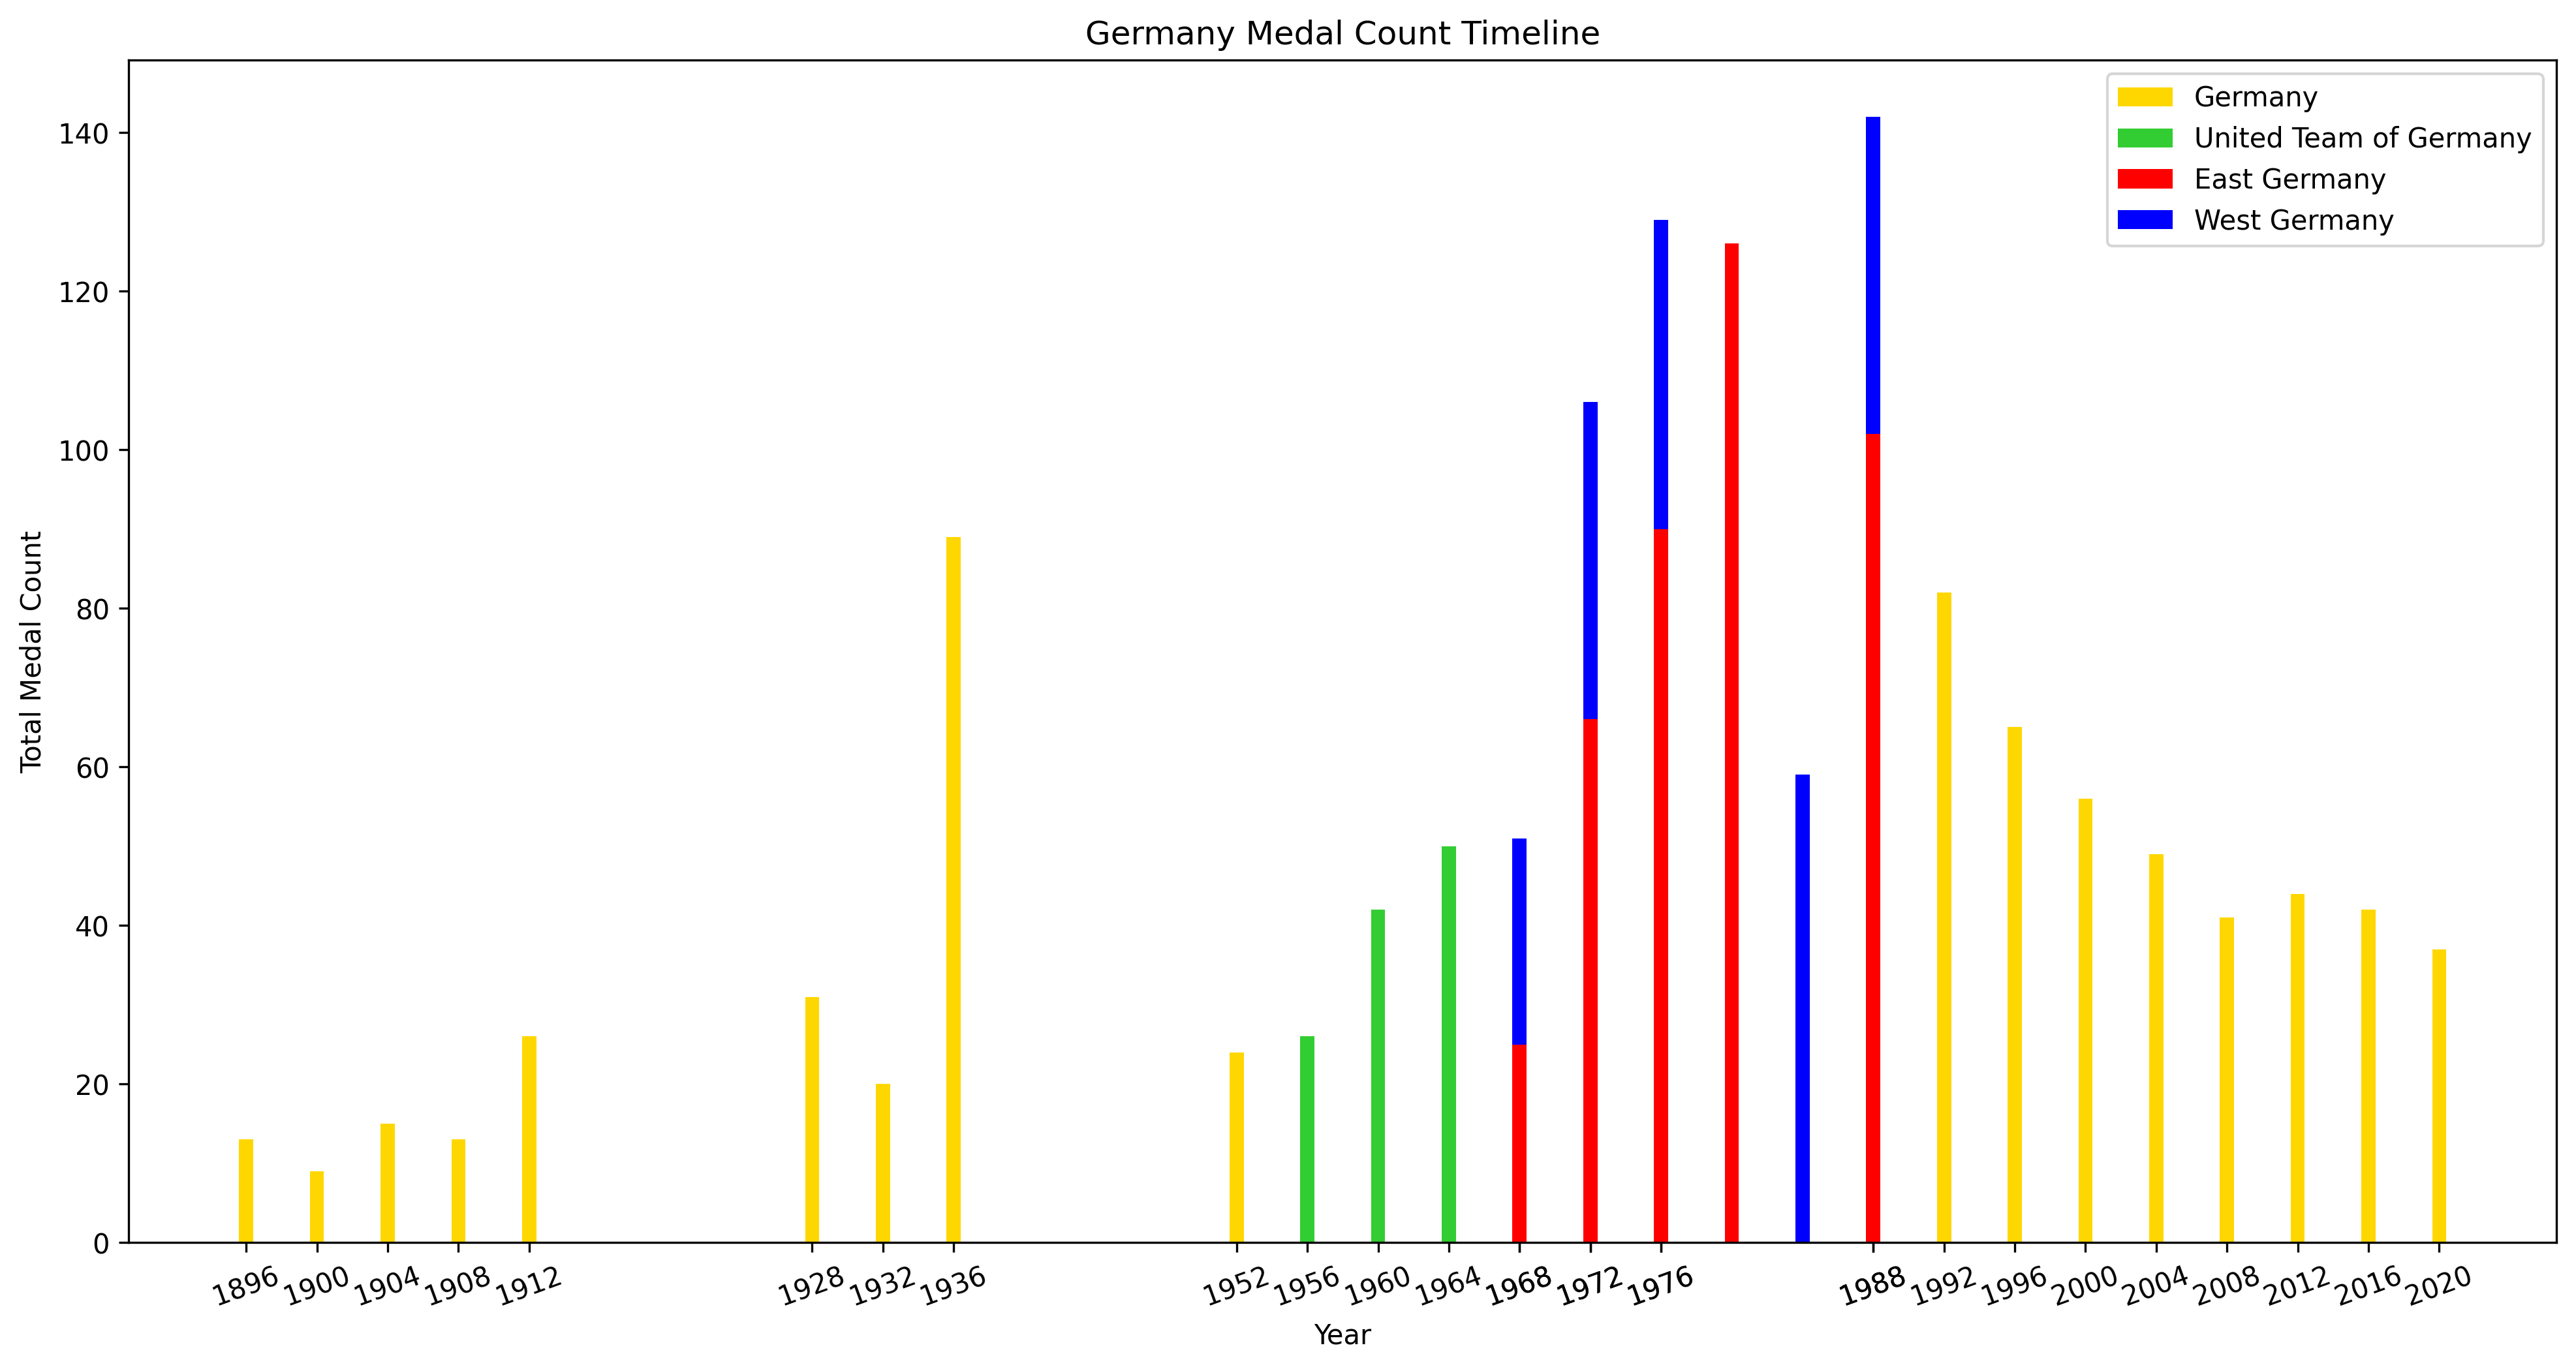

In [22]:
dfWithoutHost = df.drop(columns=['Host_country', 'Host_city'])
dfG = dfWithoutHost[(dfWithoutHost['Country_Name'] == 'Germany')]
dfUTG = dfWithoutHost[(dfWithoutHost['Country_Name'] == 'United Team of Germany')]
dfWG = dfWithoutHost[(dfWithoutHost['Country_Name'] == 'West Germany')]

# get West Germany and East Germany Medal Counts
# seperate out 1980 and 1984 from East Germany and West Germany respectively for plotting reasons
dfEG = dfWithoutHost[(dfWithoutHost['Country_Name'] == 'East Germany') & (
    dfWithoutHost['Year'] != 1980)]
dfWG = dfWithoutHost[(dfWithoutHost['Country_Name'] == 'West Germany') & (
    dfWithoutHost['Year'] != 1984)]

#  1980 and 1984 data from West Germany and East Germany, used plot
EG1980 = int(dfWithoutHost[(dfWithoutHost['Country_Name'] == 'East Germany') & (
    dfWithoutHost['Year'] == 1980)]['Total'])
WG1984 = int(dfWithoutHost[(dfWithoutHost['Country_Name'] == 'West Germany') & (
    dfWithoutHost['Year'] == 1984)]['Total'])

x = np.arange(1, 13).tolist()
plt.figure(figsize=(16, 8))

# plot germany and unified team
plt.bar(dfG['Year'], dfG['Total'], label='Germany', color='gold')
plt.bar(dfUTG['Year'], dfUTG['Total'],
        label='United Team of Germany', color='limegreen')
# plot east and west germany as stacked bars
plt.bar(dfEG['Year'], dfEG['Total'], label='East Germany', color='r')
plt.bar(1980, EG1980, color='r')
plt.bar(dfWG['Year'], dfWG['Total'], label='West Germany', bottom=dfEG['Total'], color='b')
plt.bar(1984, WG1984, color='b')

plt.xlabel('Year')
plt.ylabel('Total Medal Count')
plt.title('Germany Medal Count Timeline')
plt.legend()

plt.xticks(dfG['Year'].append(dfUTG['Year']).append(
    dfEG['Year']).append(dfWG['Year']), rotation=20)
plt.show()

Next we will plot and analyse the Soviet Unions data.

In 1980, The Soviet Union won the most gold and overall medals. Together with East Germany (which was administered and occupied by Soviet forces following the end of World War II) they won 127 out of 203 available gold medals. 

Led by the United States, 66 countries boycotted the games entirely, for 65 out of the 66 countries, the official reasoning was because of the Soviet–Afghan War[(U.S. Department of State, 2010)](https://web.archive.org/web/20100204004633/http://history.state.gov/milestones/1977-1980/Olympic) . The Soviet Union and its allies later boycotted the 1984 Summer Olympics in the United States (Los Angeles). 

1988 was the last Olympics that the Soviet Union officially participated in, as the dissolution of Soviet Union happened in 1991, before the 1992 Olympic Games.

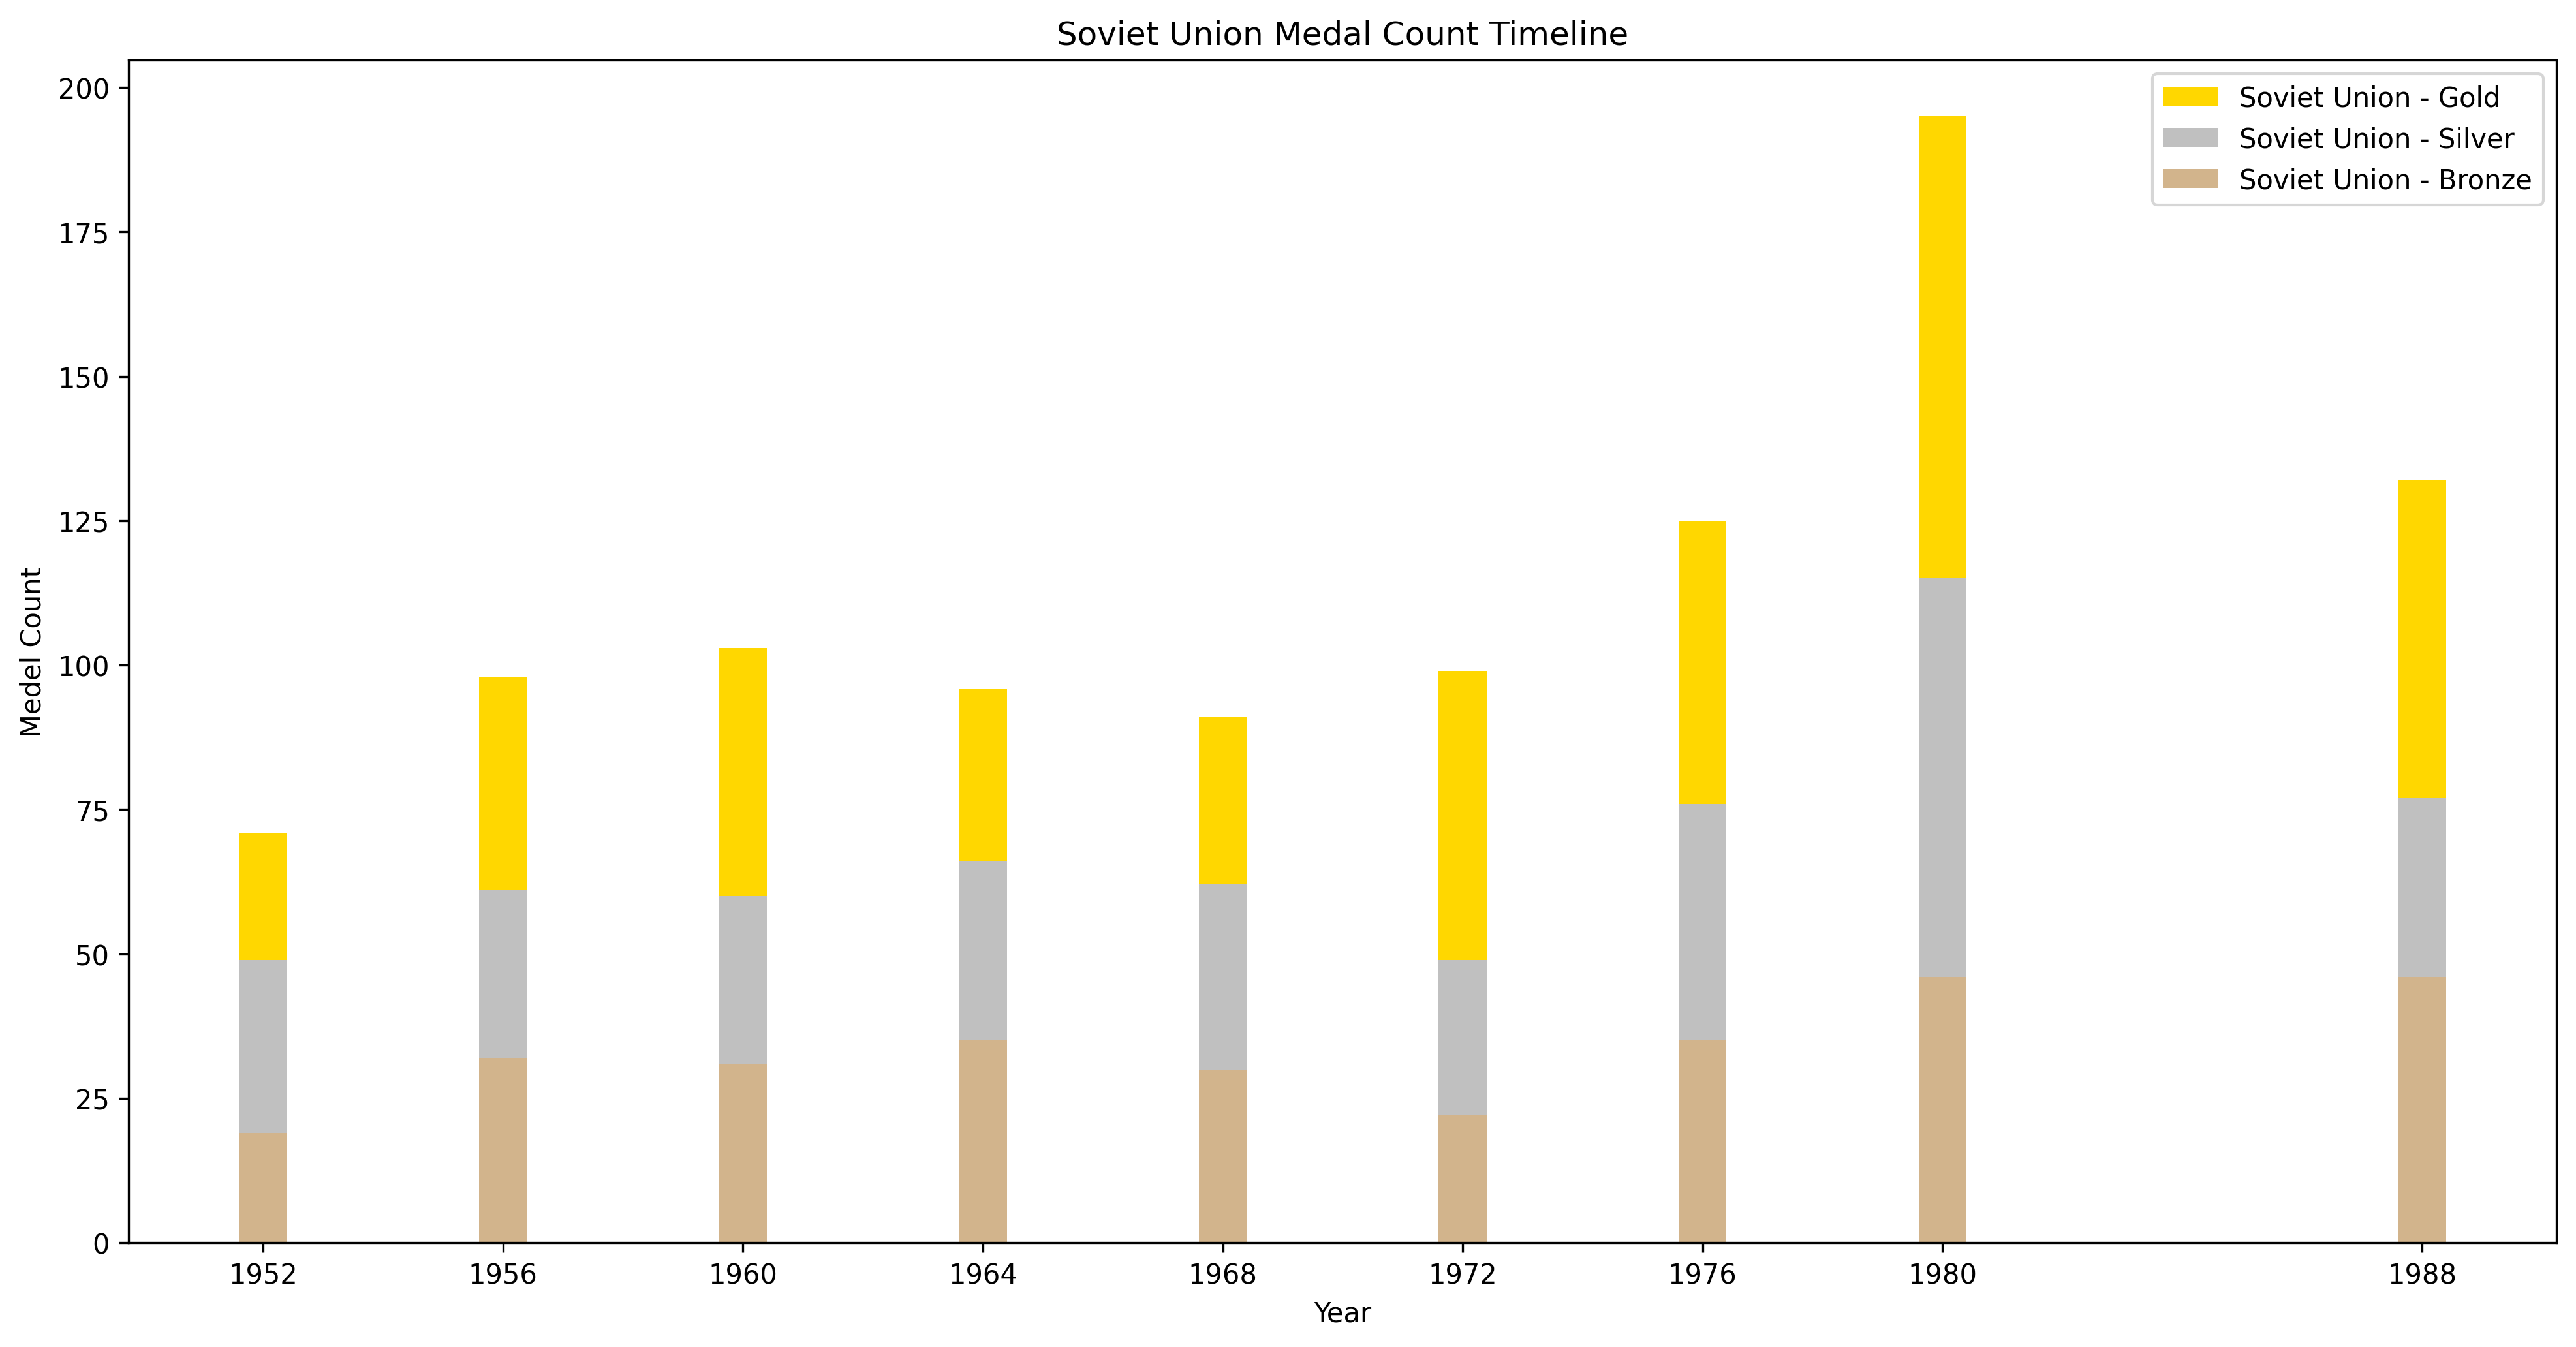

In [23]:
dfSU = dfWithoutHost[(dfWithoutHost['Country_Name'] == 'Soviet Union')]

x = np.arange(1, 13).tolist()
plt.figure(figsize=(16, 8))
plt.bar(dfSU['Year'], dfSU['Gold'], label='Soviet Union - Gold',
        bottom=dfSU['Bronze']+dfSU['Silver'], color='gold')
plt.bar(dfSU['Year'], dfSU['Silver'], label='Soviet Union - Silver',
        bottom=dfSU['Bronze'], color='silver')
plt.bar(dfSU['Year'], dfSU['Bronze'],
        label='Soviet Union - Bronze', color='tan')

plt.xlabel('Year')
plt.ylabel('Medel Count')
plt.title('Soviet Union Medal Count Timeline')
plt.legend()
plt.xticks(dfSU['Year'])
plt.show()

The United States medal count is plotted and analyzed next, earlier in the analysis, we found out about the 1984 boycott involved 14 Eastern Bloc countries and allies, led by the Soviet Union. [(Infoplease, 2006)](https://web.archive.org/web/20060618175049/http://www.infoplease.com/ipsa/A0114812.html). This led directly to United States winning by far the most medals in that particular Olympics.

However, that's not the record for most medals won in a single Olympics game, the United States has that record from an earlier game, with 234 total medals in the 1904 Olympic games. That's because tensions caused by the Russo–Japanese War and difficulties in traveling to St. Louis in 1904 resulted in very few top-class athletes from outside the US and Canada taking part in the 1904 Games. Only 62 out of the 651 athletes who competed came from outside North America, and 523 out of the 651 athletes are from the United States, so a lot of events had just US athletes competing in them. [(Mallon, 2011)](https://web.archive.org/web/20110602125622/http://www.la84foundation.org/6oic/OfficialReports/Mallon/1904.pdf)

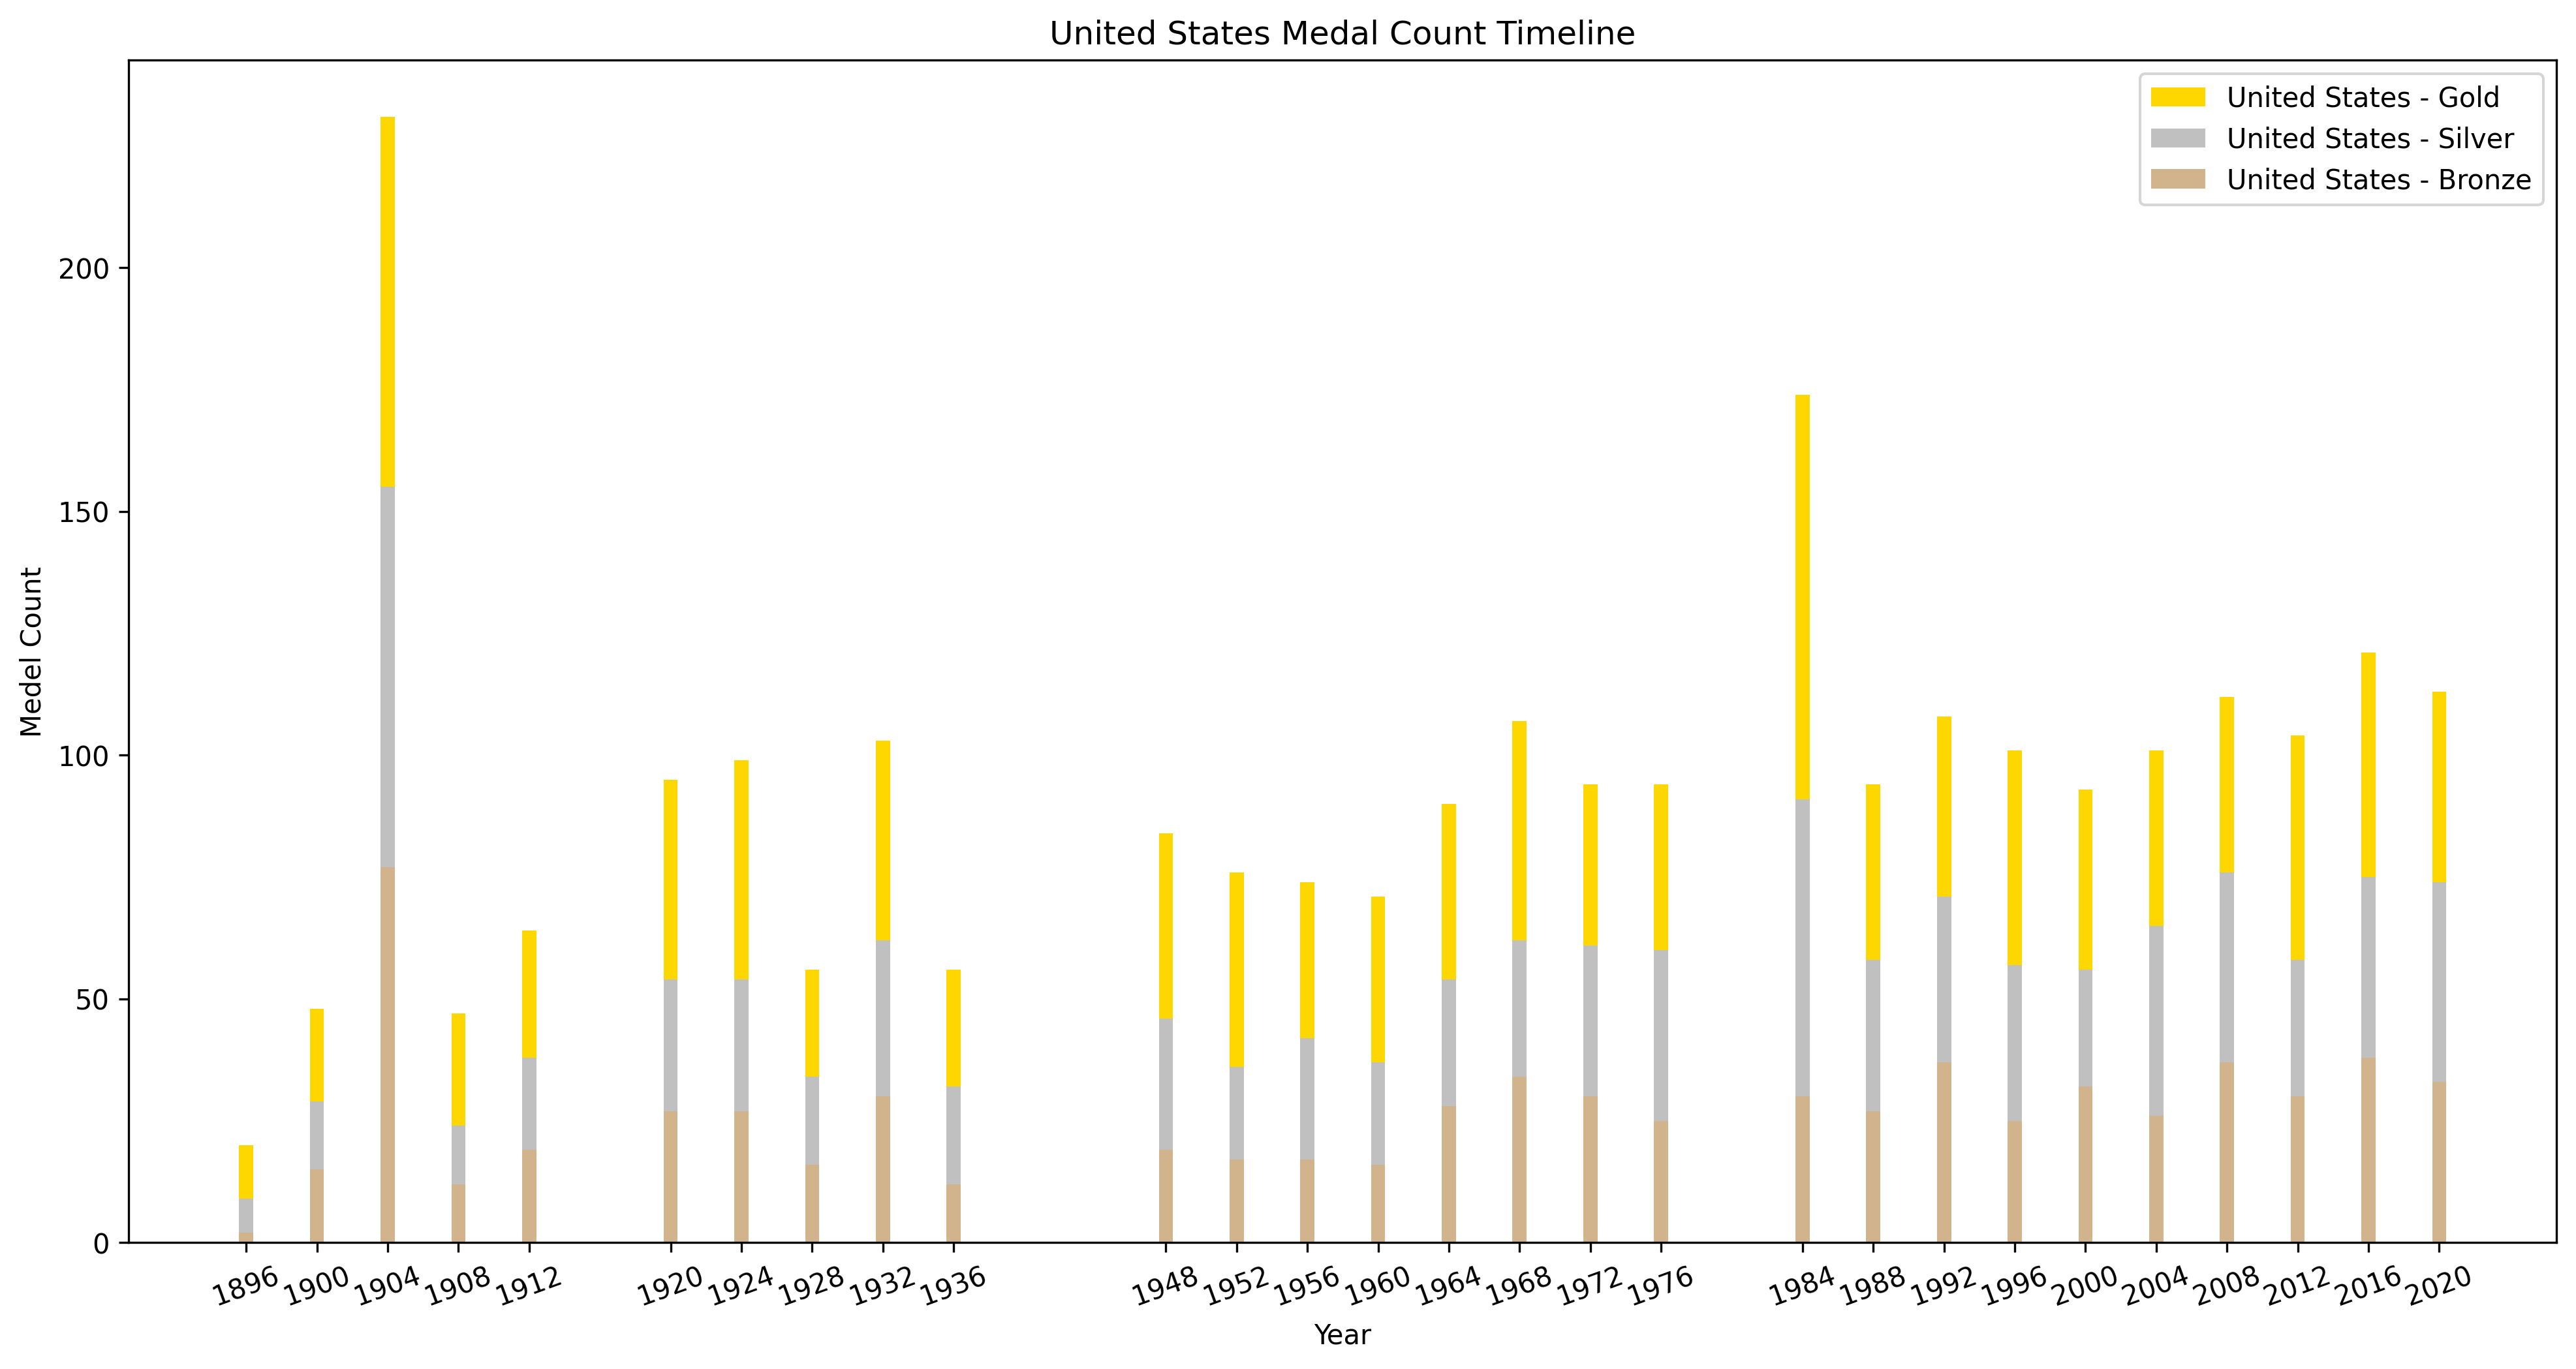

In [24]:
dfUS = dfWithoutHost[(dfWithoutHost['Country_Name'] == 'United States')]

x = np.arange(1, 13).tolist()
plt.figure(figsize=(16, 8))
plt.bar(dfUS['Year'], dfUS['Gold'], label='United States - Gold',
        bottom=dfUS['Bronze']+dfUS['Silver'], color='gold')
plt.bar(dfUS['Year'], dfUS['Silver'], label='United States - Silver',
        bottom=dfUS['Bronze'], color='silver')
plt.bar(dfUS['Year'], dfUS['Bronze'],
        label='United States - Bronze', color='tan')

plt.xlabel('Year')
plt.ylabel('Medel Count')
plt.title('United States Medal Count Timeline')
plt.legend()
plt.xticks(dfUS['Year'], rotation=20)
plt.show()


Lets wrap up now by doing a follow up to our question 3, where we found the countries with the most medals, lets now take the top countries in terms of medal count, and plot them out to analyze any trends we see.

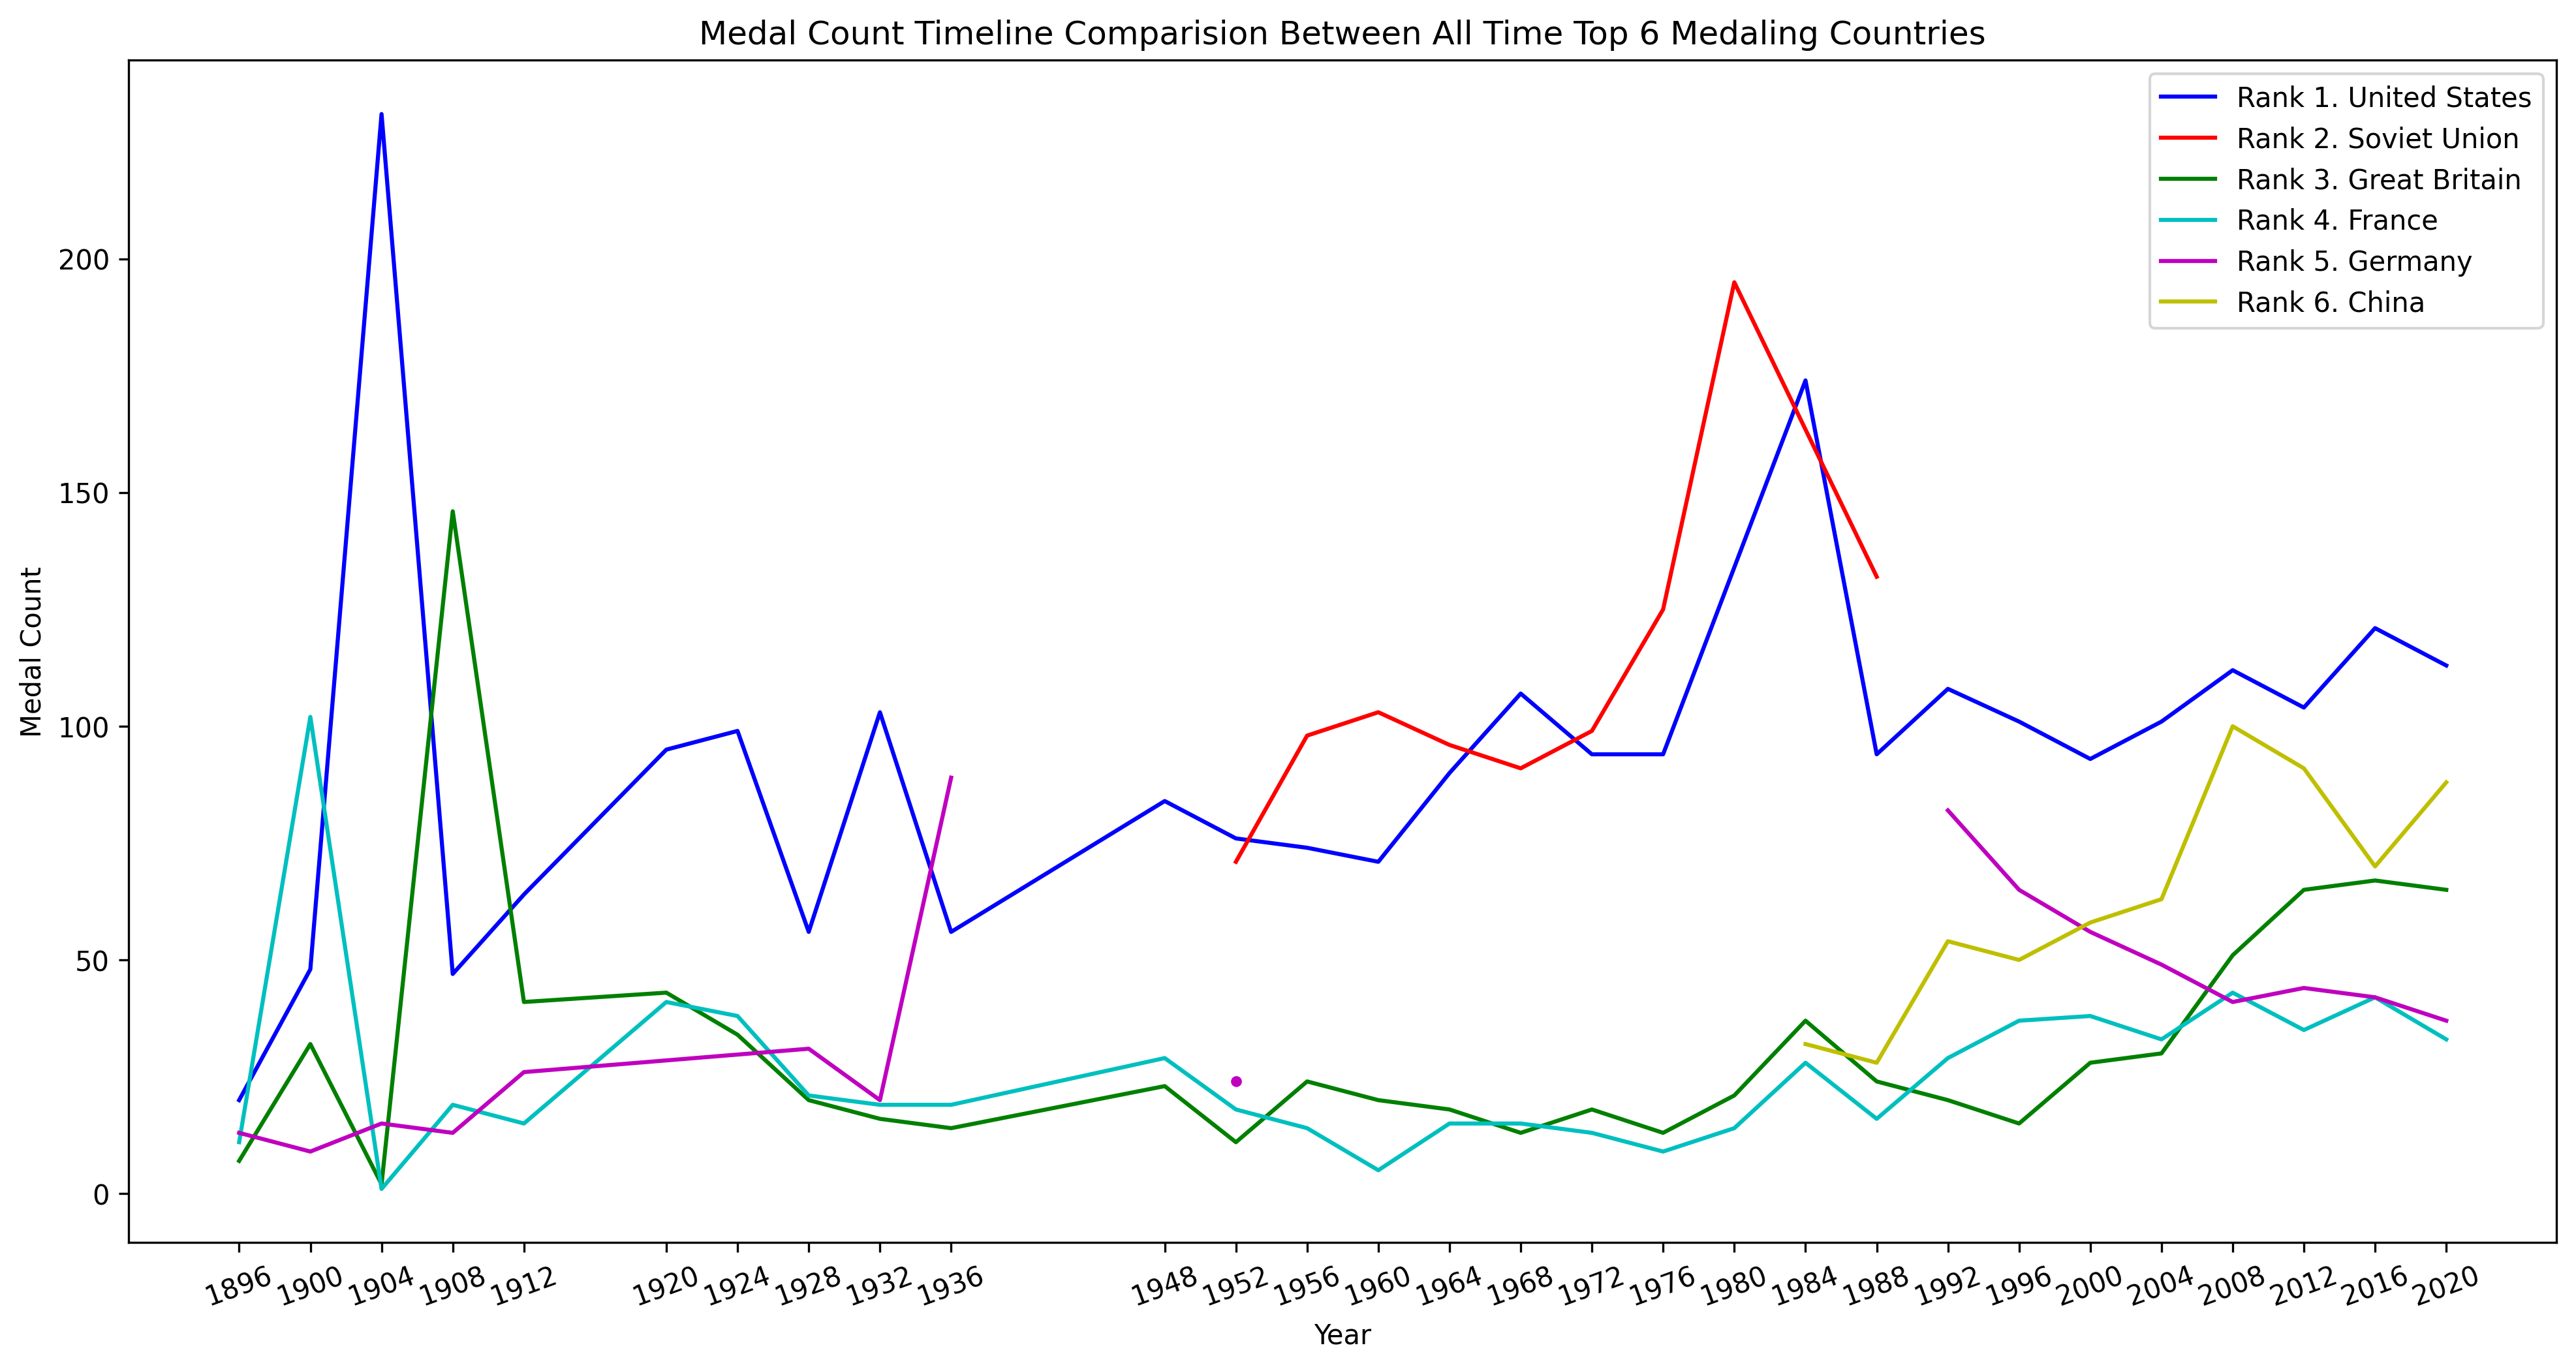

In [25]:
# make df
dfUS = dfWithoutHost[(dfWithoutHost['Country_Name'] == 'United States')]
dfSU = dfWithoutHost[(dfWithoutHost['Country_Name'] == 'Soviet Union')]
dfGB = dfWithoutHost[(dfWithoutHost['Country_Name'] == 'Great Britain')]
dfFR = dfWithoutHost[(dfWithoutHost['Country_Name'] == 'France')]
# split germany to 3 seperate series for line plotting purposes
dfGE_pre36 = dfWithoutHost[(dfWithoutHost['Country_Name'] == 'Germany') & (
    dfWithoutHost['Year'] <= 1936)]
dfGE_52 = dfWithoutHost[(dfWithoutHost['Country_Name'] == 'Germany') & (
    dfWithoutHost['Year'] == 1952)]
dfGE_post92 = dfWithoutHost[(dfWithoutHost['Country_Name'] == 'Germany') & (
    dfWithoutHost['Year'] >= 1992)]
dfCN = dfWithoutHost[(dfWithoutHost['Country_Name'] == 'China')]

# plot figure
plt.figure(figsize=(16, 8))
plt.plot(dfUS['Year'], dfUS['Total'], 'b-', label='Rank 1. United States')
plt.plot(dfSU['Year'], dfSU['Total'], 'r-', label='Rank 2. Soviet Union')
plt.plot(dfGB['Year'], dfGB['Total'], 'g-', label='Rank 3. Great Britain')
plt.plot(dfFR['Year'], dfFR['Total'], 'c-', label='Rank 4. France')
plt.plot(dfGE_pre36['Year'], dfGE_pre36['Total'], 'm-', label='Rank 5. Germany')
plt.plot(dfGE_52['Year'], dfGE_52['Total'], 'm.')
plt.plot(dfGE_post92['Year'], dfGE_post92['Total'], 'm-')
plt.plot(dfCN['Year'], dfCN['Total'], 'y-', label='Rank 6. China')


plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title('Medal Count Timeline Comparision Between All Time Top 6 Medaling Countries')
plt.xticks(dfWithoutHost['Year'].unique(), rotation=20)
plt.legend()
plt.show()


We can see from the above plot, that the United States is consistently at the top of the medal table, with only the former Soviet Union able to consistently challenge it for top spot on the medal table during the Cold War period.

We can also see that the earlier Olympics are dominated by the host country, with France, US, and UK topping the medal table by a long shot in 1900, 1904, and 1908 respectively. This shows that the Olympics has yet to gain traction worldwide in it's early stages.

Several significant global political events can be prominently seen on the medal table, including the nazi Germany era of the 1930s, the Cold War period of early 1950s to late 1980s, the dissolution of Soviet Union in early 1990s, and the rise of China as an economic powerhouse in the late 1990s and early 2000s.

One interesting observation to note is that the United Kingdom is slowly re-immerging up the medal table starting in the early 2000s, the pace of ascension up the medal table is similar to China's, however, with UK, there are no related political event in the same time period that coincides with this, and no obvious economic data to support this rise either as the UK's GDP growth from 2000 to 2020 of 163% [(The World Bank Group, 2021a)](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?end=2020&locations=GB&start=2000) is slightly behind global GDG growth of 252% [(The World Bank Group, 2021b)](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?end=2020&start=2000). Through our research, we conclude that this is most likely due to UK's own sports funding program, which has seen funding increase 466% from 2000 to 2020 [(UK Sport, 2021)](https://www.uksport.gov.uk/our-work/investing-in-sport/historical-funding-figures). This shows that although global politics play a large role in a country's results at Olympics, government prioritization and support for it's sports programs is also very important to a country's success at the Olympic games.

Lastly, we end off our analysis with a little fun plot for Canada!

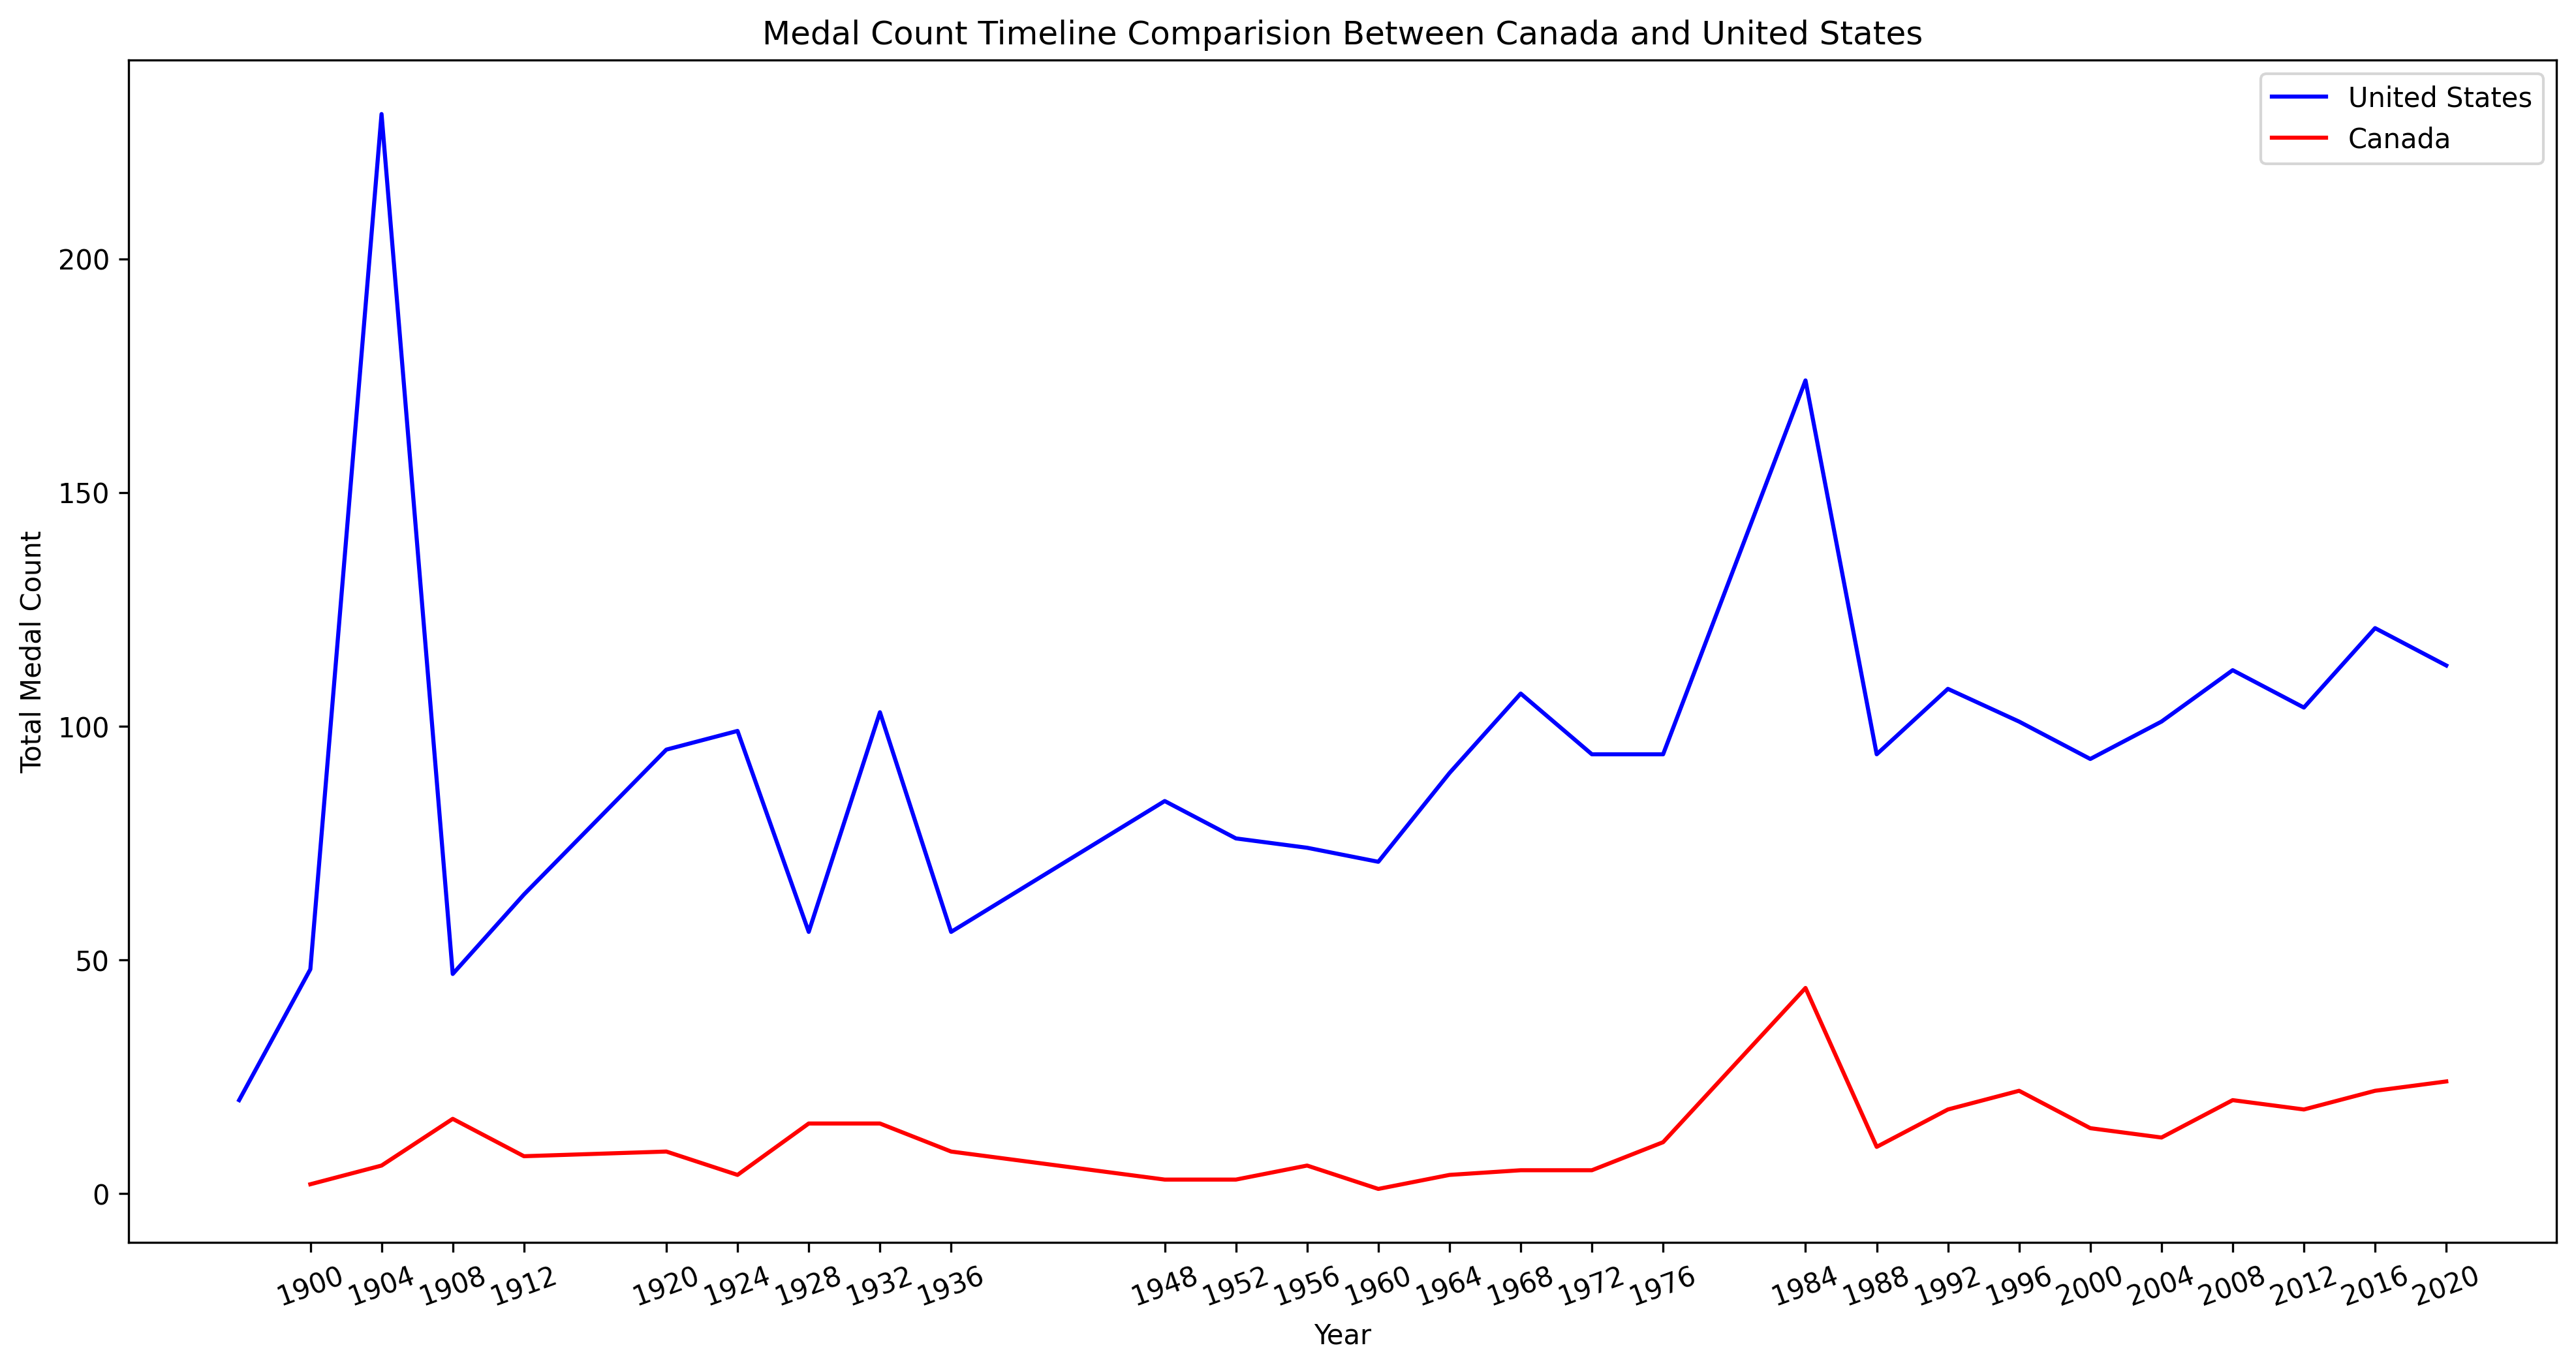

In [26]:
# make df
dfUSA = dfWithoutHost[(dfWithoutHost['Country_Name'] == 'United States')]
dfCA = dfWithoutHost[(dfWithoutHost['Country_Name'] == 'Canada')]
#dfMX = dfWithoutHost[(dfWithoutHost['Country_Name'] == 'Mexico')]
#dfGB = dfWithoutHost[(dfWithoutHost['Country_Name'] == 'Great Britain')]

plt.figure(figsize=(16, 8))
plt.plot(dfUSA['Year'], dfUSA['Total'], 'b-', label='United States')
plt.plot(dfCA['Year'], dfCA['Total'], 'r-', label='Canada')
# plt.plot(dfMX['Year'], dfMX['Total'], 'y-', label='Mexico')
# plt.plot(dfGB['Year'], dfGB['Total'], 'g-', label='Great Britain')

plt.xlabel('Year')
plt.ylabel('Total Medal Count')
plt.title('Medal Count Timeline Comparision Between Canada and United States')
plt.legend()
plt.xticks(dfCA['Year'], rotation= 20)
plt.show()

As you can see in the plot above. Canada and the United States medal count plots mirror eachother almost perfectly. We also checked Mexico (due to proximity) and other countries (with close political ties, like the United Kingdom), and we weren't able to find the same relationship in their medal count plots.

We really are America's little brother! (just kidding! but not really...)

## Conclusion

(1) United States is the country that has hosted the most Olympics, Europe is the continent that has hosted the most Olympics. Africa and Antarctica are the only continents that have never hosted the Olympics.

(2) Being host country can improve the average medals tally. 

(3) The medals tally of one country is related to its economony size.

(4) The Olympics strives to not be political, but from the history we could see the politics can affect the Olympics games, both in terms of participating countries, and medal counts. Government's prioritization and support for it's sports programs is very important to a country's success at the Olympic games.

## References

- Benagh, J. (2019). _The History of the Olympic Games | Scholastic._ [online] Scholastic.com. Available at: <https://www.scholastic.com/teachers/articles/teaching-content/history-olympic-games/>
- Douglas, P.S. (2004). Citius, altius, fortius (the olympic motto: swifter, higher, stronger) Editorials published in the Journal of the American College of Cardiology reflect the views of the authors and do not necessarily represent the views of JACCor the American College of Cardiology. _Journal of the American College of Cardiology,_ 44(1), pp.150–151.
- Procon.org (2020). _Hosting the Olympic Games - Top 3 Pros and Cons._ [online] ProCon.org. Available at: <https://www.procon.org/headlines/hosting-the-olympic-games-top-3-pros-and-cons/>
- Tanoeiro, R. (2021) _Summer Olympic Medals 1896 - 2020_ [Online]. Available at: <https://www.kaggle.com/ramontanoeiro/summer-olympic-medals-1986-2020> (Accessed: 25 September 2021)
- Creative Commons Corporation (2021) CC0 1.0 Universal (CC0 1.0) Public Domain Dedication [Online]. Available at: <https://creativecommons.org/publicdomain/zero/1.0/> (Accessed: 25 September 2021)

- Sen, S. (2021). Data | Does economy determine a country’s performance at Olympics? The Hindu. [online] 14 Aug. Available at: <https://www.thehindu.com/data/data-does-economy-determine-a-countrys-performance-at-olympics/article35899178.ece> [Accessed 15 Oct. 2021].

- World Population Review (2020). GDP Ranked by Country 2020. [online] worldpopulationreview.com. Available at: <https://worldpopulationreview.com/countries/countries-by-gdp>.

- Asgari, B., & Khorshidi, R. (2013). _The effect of hosting on performance of host countries in summer and winter Olympic Games._ Scholars Research Library. European Journal of Sports and Exercise Science, 2(4), 1-6.

- IOC Athletes’ Commission. (2021) Rule 50 Guidelines. [ebook] Available at: <https://stillmedab.olympic.org/media/Document%20Library/OlympicOrg/News/2020/01/Rule-50-Guidelines-Tokyo-2020.pdf> [Accessed 20 October 2021].
- Wikipedia. (2021) Cancelled Olympic Games - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Category:Cancelled_Olympic_Games> [Accessed 20 October 2021].
- Wikipedia. (2021) Germany at the Olympics - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Germany_at_the_Olympics> [Accessed 20 October 2021].
- Large, D. (2007) Nazi games: The Olympics of 1936. p.58.
- U.S. Department of State. (2010) The Olympic Boycott, 1980. [online] Available at: <https://web.archive.org/web/20100204004633/http://history.state.gov/milestones/1977-1980/Olympic> [Accessed 20 October 2021].
- Infoplease. (2006) 1984 Olympics. [online] Available at: <https://web.archive.org/web/20060618175049/http://www.infoplease.com/ipsa/A0114812.html> [Accessed 20 October 2021].
- Mallon, B., (2011) 1904 Olympic Games – Analysis and Summaries. [ebook] Available at: <https://web.archive.org/web/20110602125622/http://www.la84foundation.org/6oic/OfficialReports/Mallon/1904.pdf> [Accessed 20 October 2021].
- The World Bank Group. (2021a) GDP (current US$) - United Kingdom | Data. [online]. Available at: <https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?end=2020&locations=GB&start=2000> [Accessed 20 October 2021].
- The World Bank Group. (2021b) GDP (current US$) - World | Data. [online] Available at: <https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?end=2020&start=2000> [Accessed 20 October 2021].
- UK Sport, 2021. UK Sport Historical Funding Figures. [online] Available at: <https://www.uksport.gov.uk/our-work/investing-in-sport/historical-funding-figures> [Accessed 20 October 2021].
